In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## 데이터 확인

In [2]:
# 데이터 불러오기
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
df_train.shape, df_test.shape, df_submission.shape

((891, 12), (418, 11), (418, 2))

In [4]:
df_train.head()
# survived : 0사망, 1생존
# Pclass : 1 = 1st, 2 = 2nd, 3 = 3rd
# SibSp : 함께 탑승한 형제자매/배우자 수
# Parch : 함께 탑승한 부모/자녀 수
# Carbin : 객실번호 
# Embarked : 탑승구

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df_train.isnull().sum()/df_train.shape[0]
# age약 20%, carbin 약 77%, Embarked 약 0.002% 결측

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [8]:
df_test.isnull().sum()/df_test.shape[0]
# age약 20%, carbin 약 78%, Fare 약 0.002% 결측

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

## 데이터 시각화

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_18/2685553999.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


- 총 생존인원 확인

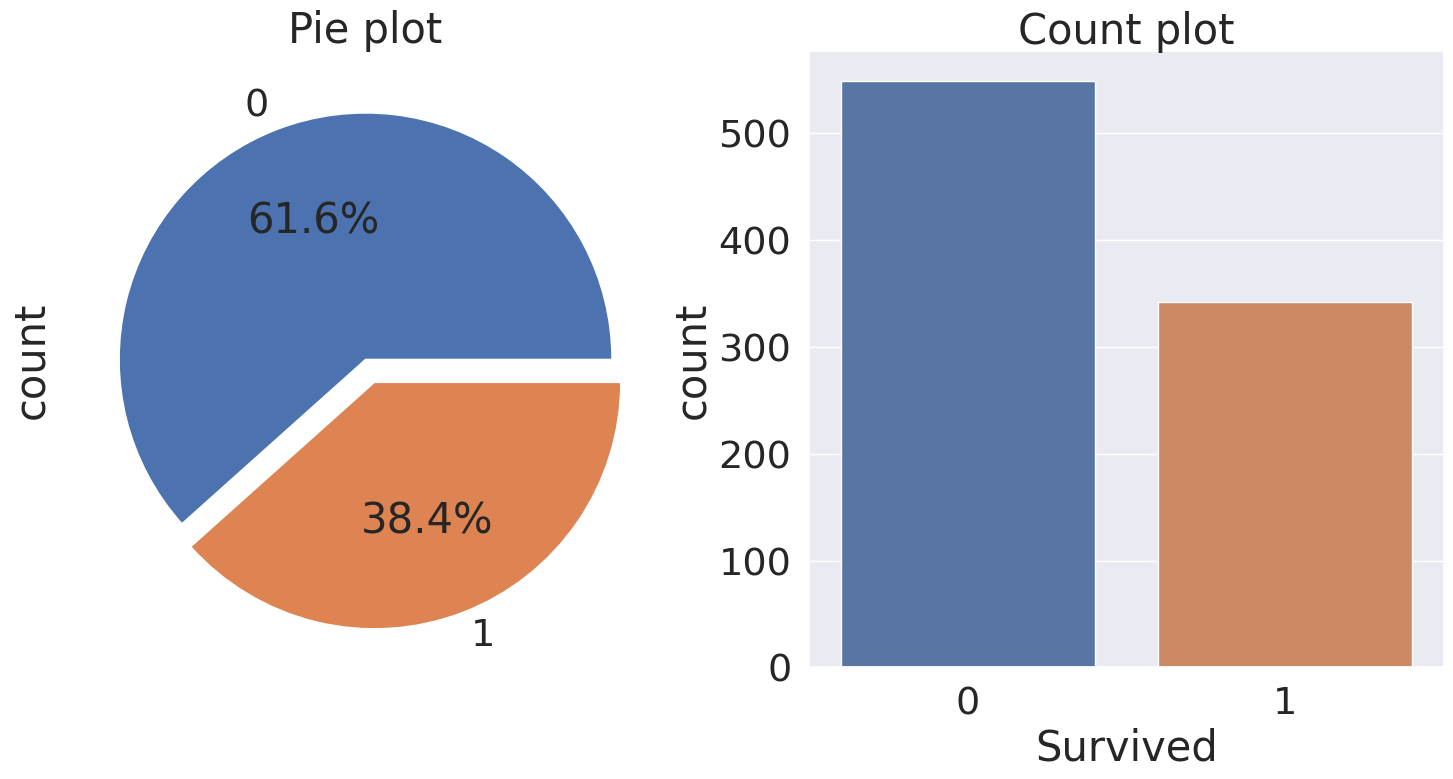

In [10]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
ax[0].set_title('Pie plot')
ax[1].set_title('Count plot')

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0])
sns.countplot(x = 'Survived', data = df_train, ax=ax[1])

plt.show()

- Pclass 별 생존률 확인

In [11]:
# P_class 별 탑승 인원
df_train[['Pclass', 'Survived']].groupby(['Pclass']).count()

# 3등석인원이 가장 많고, 1 -> 2가 그다음으로 많다

,Survived
Pclass,
1,216
2,184
3,491


In [12]:
# P_class별 생존인원 
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [13]:
# P_class 별 생존 확률
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

# 3등석이 가장 낮다

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Pclass'>

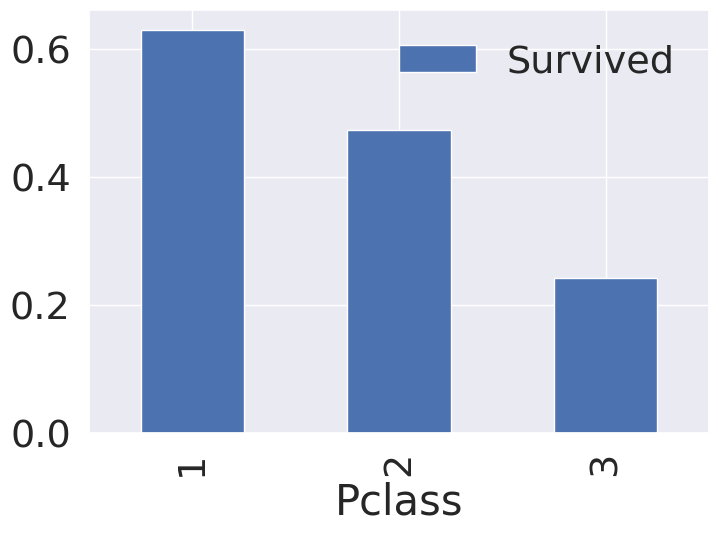

In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar()
# 등급이 높을수록 생존률이 높다.

- 성별 별 생존인원 확인

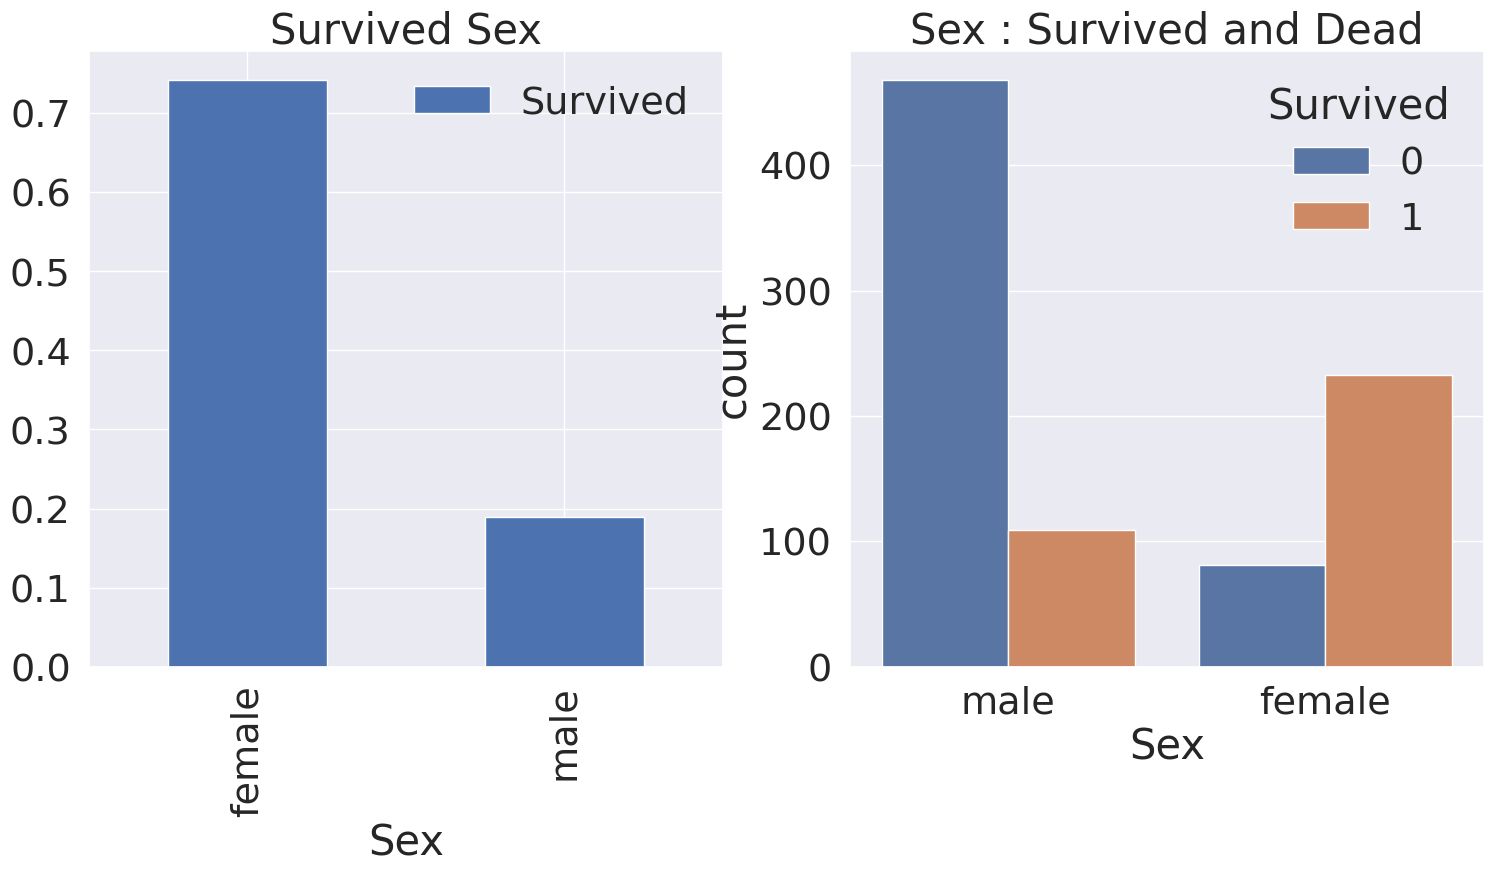

In [15]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

ax[0].set_title('Survived Sex')
ax[1].set_title('Sex : Survived and Dead')

df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
sns.countplot(x = 'Sex', hue = 'Survived', data = df_train, ax = ax[1])

plt.show()

# 여성의 생존률이 높다.

<Axes: xlabel='Pclass', ylabel='Survived'>

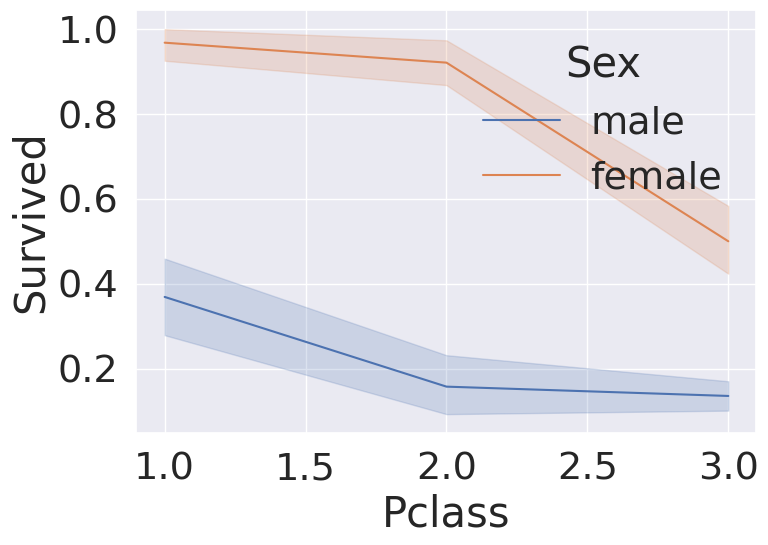

In [16]:
sns.lineplot(x = 'Pclass', y= 'Survived', hue = 'Sex', data = df_train)

# 모든 Pclass에서 여성생존률이 더 높음

In [17]:
# 나이 분포 확인 
df_train['Age'].describe()

# 평균 29.7세

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

- 나이대별 생존률 확인

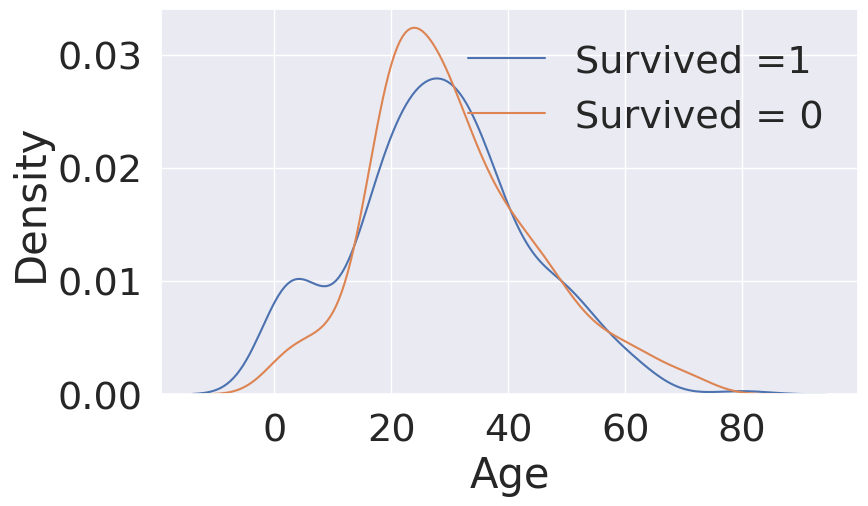

In [18]:
fig, ax = plt.subplots(1, 1, figsize = (9,5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)

plt.legend(['Survived =1', 'Survived = 0'])
plt.show()

- 성별, Pclass에 따른 생존률

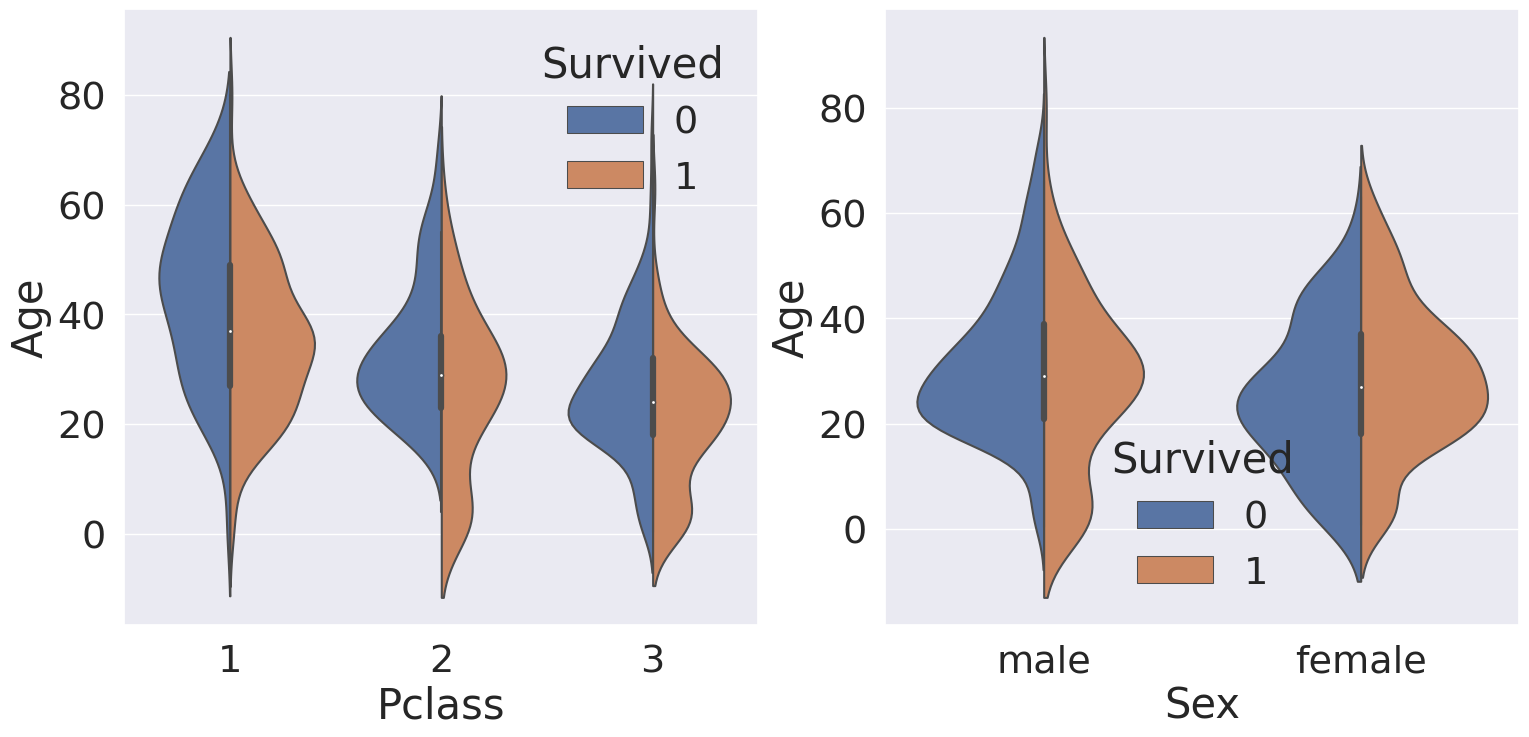

In [19]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = df_train, split = True, ax = ax[0])
sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = df_train, split = True, ax = ax[1])

plt.show()

- 나이에 따른 누적 생존확률 확인

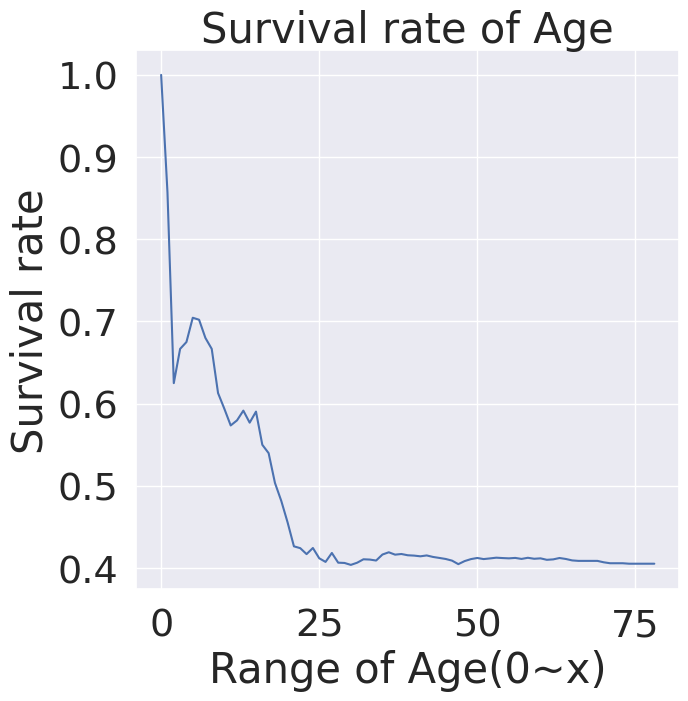

In [20]:
survive_ratio = []

for i in range(1, 80):
    survive_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize = (7, 7))
plt.plot(survive_ratio)
plt.title('Survival rate of Age')
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

# 나이가 어릴수록 생존률이 높다.

- 가족인원에 따른 생존률 확인

In [21]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# SibSp(형제자매) + Parch(부모, 자녀)를 합친 FamilySize 생성
# FamilySize = SibSp + Parch + 1(자기자신)
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [23]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [24]:
df_train['FamilySize'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

Text(0.5, 1.0, '3. Survived rate depending on Fsize')

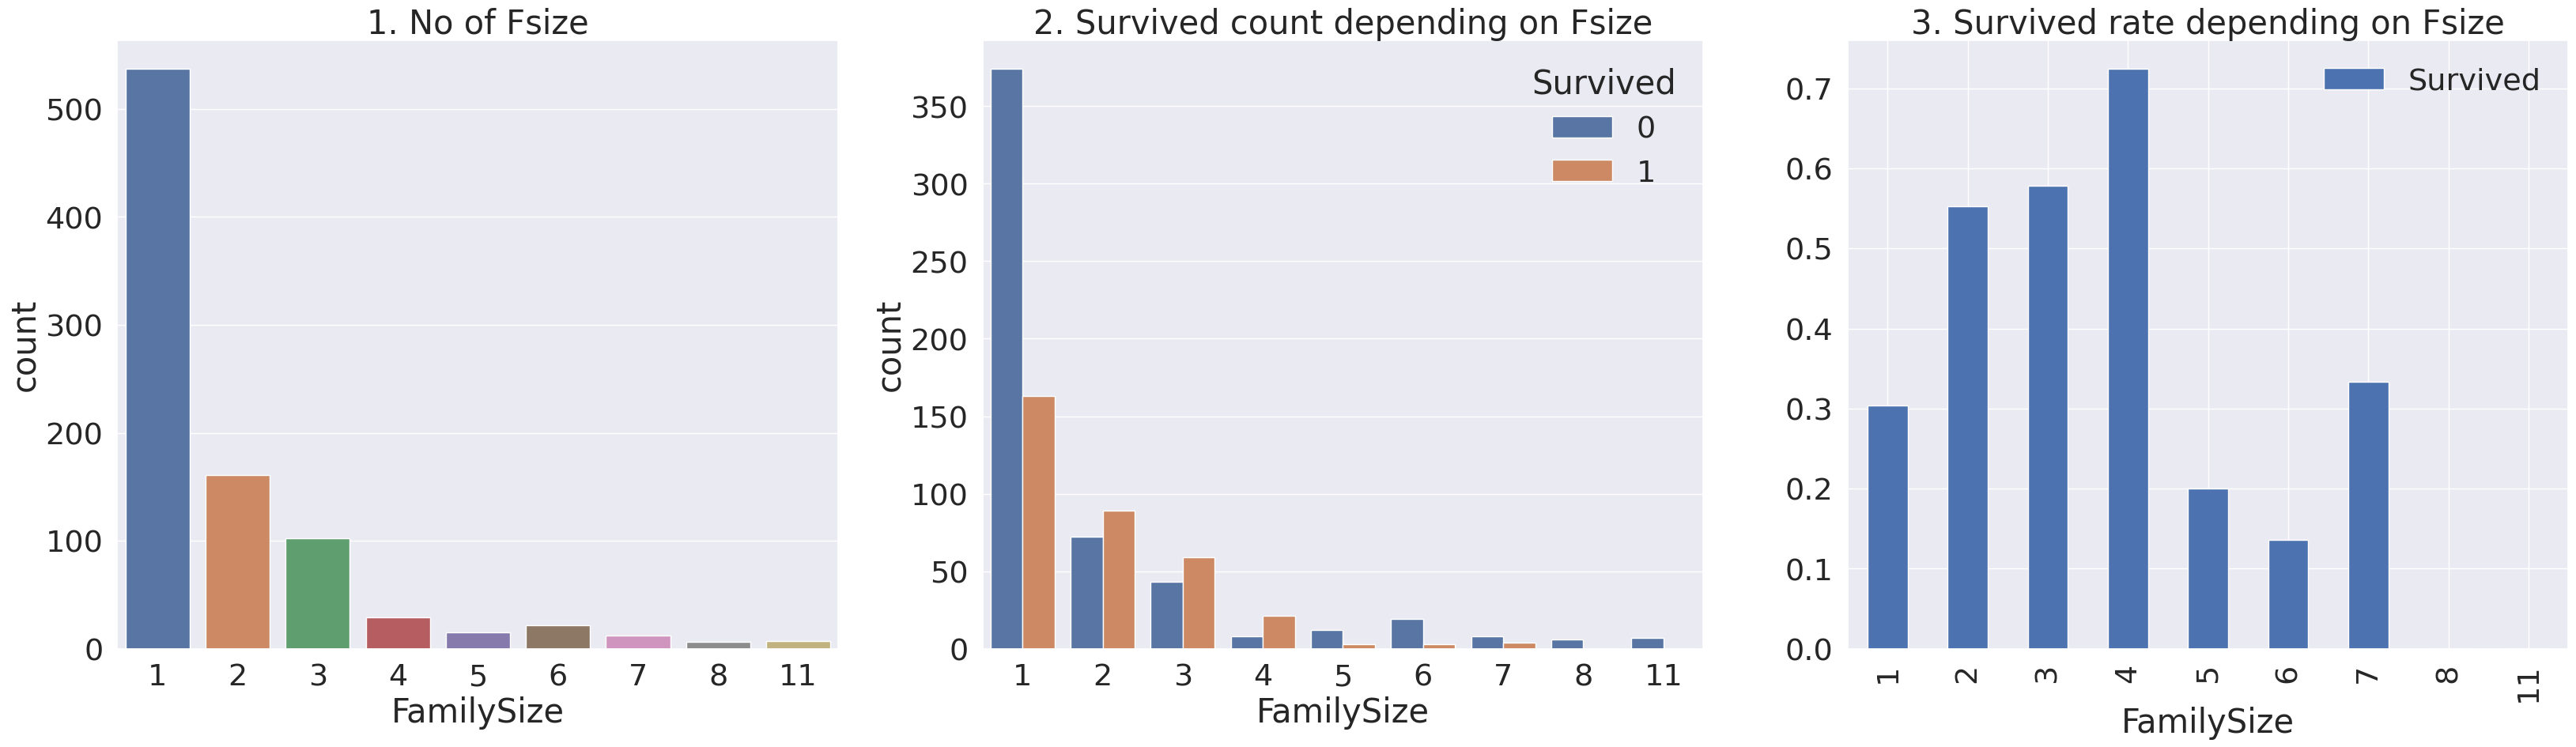

In [25]:
f, ax = plt.subplots(1,3, figsize = (40,10))

sns.countplot(x = 'FamilySize', data = df_train, ax = ax[0])
ax[0].set_title("1. No of Fsize")

sns.countplot(x = 'FamilySize', data = df_train, hue = 'Survived', ax = ax[1])
ax[1].set_title("2. Survived count depending on Fsize")

df_train[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().plot.bar(ax = ax[2])
ax[2].set_title("3. Survived rate depending on Fsize")

# 2, 3, 4인가족의 경우 생존률이 높지만 그외에는 낮음

- 운임요금 비율 확인

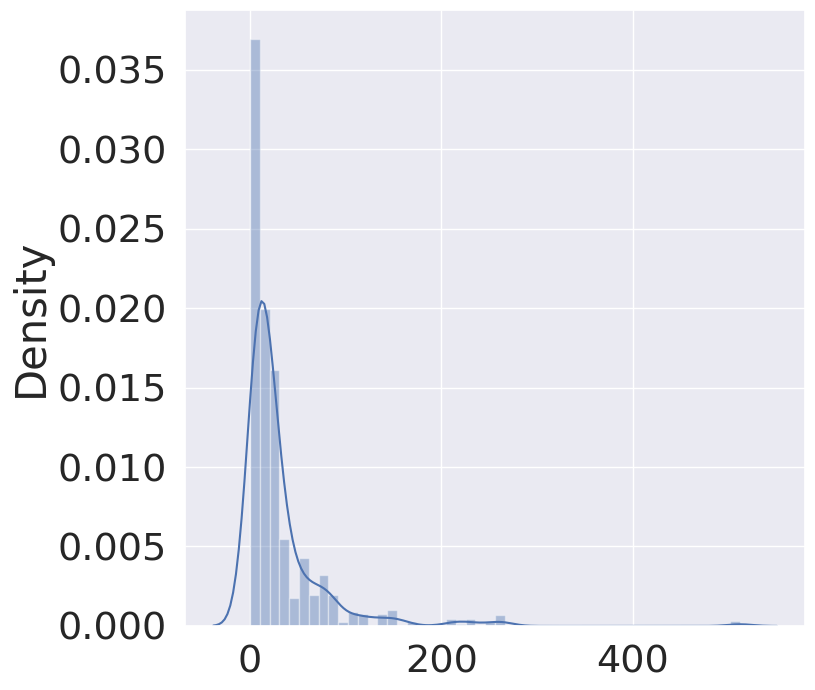

In [26]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
g = sns.distplot(x = df_train['Fare'], ax = ax)

plt.show()

In [27]:
df_train['Fare'].skew()
# 왜도 4.8 : 한쪽으로 지나치게 치우친 형태

4.787316519674893

In [28]:
# test셋에 존재하는 Null값 평균치로 대체

df_test.loc[df_test['Fare'].isnull(), 'Fare']  = df_test['Fare'].mean()

In [29]:
# 데이터 정규화를 위해 로그변환 실행

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

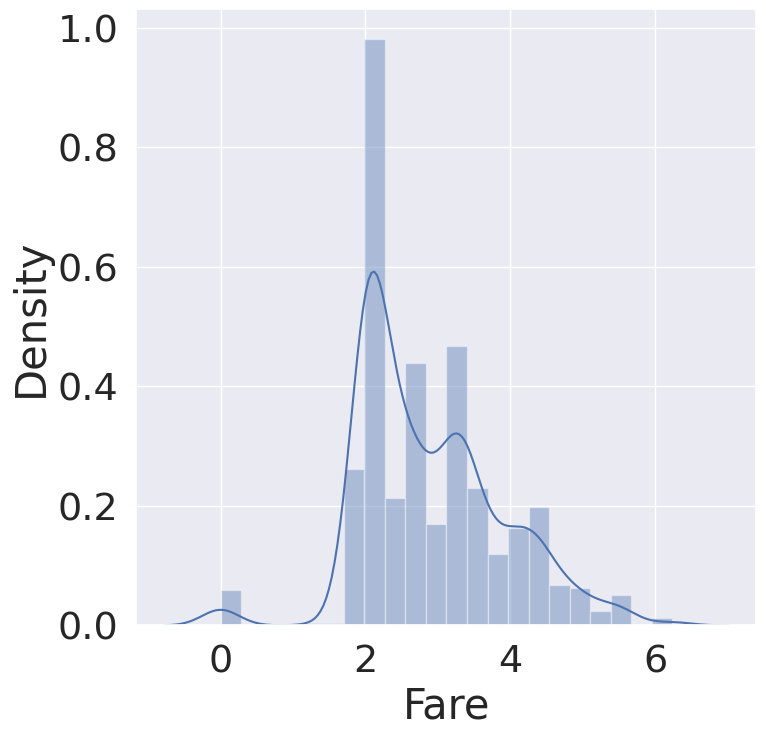

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.distplot(df_train['Fare'], ax=ax)

plt.show()
# 이전에 비해 정규분포로 변환

In [31]:
# df_train.info()
df_train['Cabin'].isnull().sum() / len(df_train['Cabin'])
# Cabin의 경우 결측치가 거의 80%.. 제거하여 예측실행

0.7710437710437711

In [32]:
df_train['Ticket'].nunique()
# Ticket의 경우에도 681개의 숫자 + 문자 등.. 의미파악이 어려움..
# Ticket도 제거

681

- 연령 결측치 처리

In [33]:
df_train['Age'].isnull().sum()
# 연령 결측치 처리 필요 -> 생존/사망에 중요한 feature이므로

177

In [34]:
# 정규표현식 사용, Mr, Mrs, Miss 등 추출
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [35]:
df_train['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [36]:
tr = pd.crosstab(df_train['Initial'], df_train['Sex']).T
tr

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [37]:
te = pd.crosstab(df_test['Initial'], df_test['Sex']).T
te

Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [38]:
tr.columns

Index(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major',
       'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'],
      dtype='object', name='Initial')

In [39]:
# 각 initial별 성별이 겹치는 경우가 없다(Dr은 Mr로 통일)

df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [40]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.564949,NaN,S,1,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3.154870,NaN,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.401197,C148,C,1,Mr


<Axes: xlabel='Initial'>

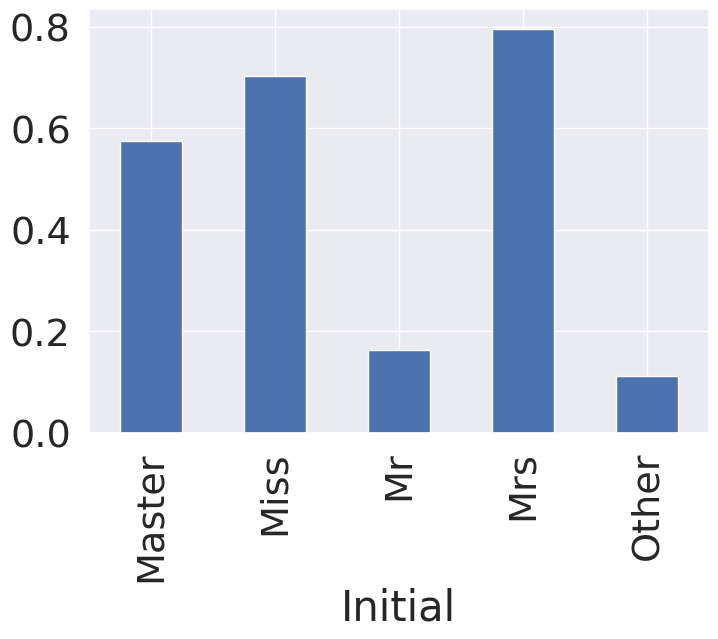

In [41]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [42]:
df_train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [43]:
# Initial별 Age 평균값으로 결측치 대체
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [44]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
Initial          0
dtype: int64

In [45]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FamilySize       0
Initial          0
dtype: int64

In [46]:
# df_train['Embarked'].value_counts() : S가 644로 가장 높은 빈도
df_train['Embarked'].fillna('S', inplace = True)

## Category형 변수 변환

- Age category화

In [47]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    


df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [48]:
df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

- Initial category화

In [49]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [50]:
df_train.groupby(['Initial'])['PassengerId'].count()

Initial
0     40
1    186
2    529
3    127
4      9
Name: PassengerId, dtype: int64

- Embarked category화

In [51]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

- 성별 category화

In [52]:
df_train['Sex'] = df_train['Sex'].map({'female' : 0, 'male' : 1 })
df_test['Sex'] = df_test['Sex'].map({'female' : 0, 'male' : 1 })

## 데이터 상관관계 확인

In [53]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat', 'Age']]

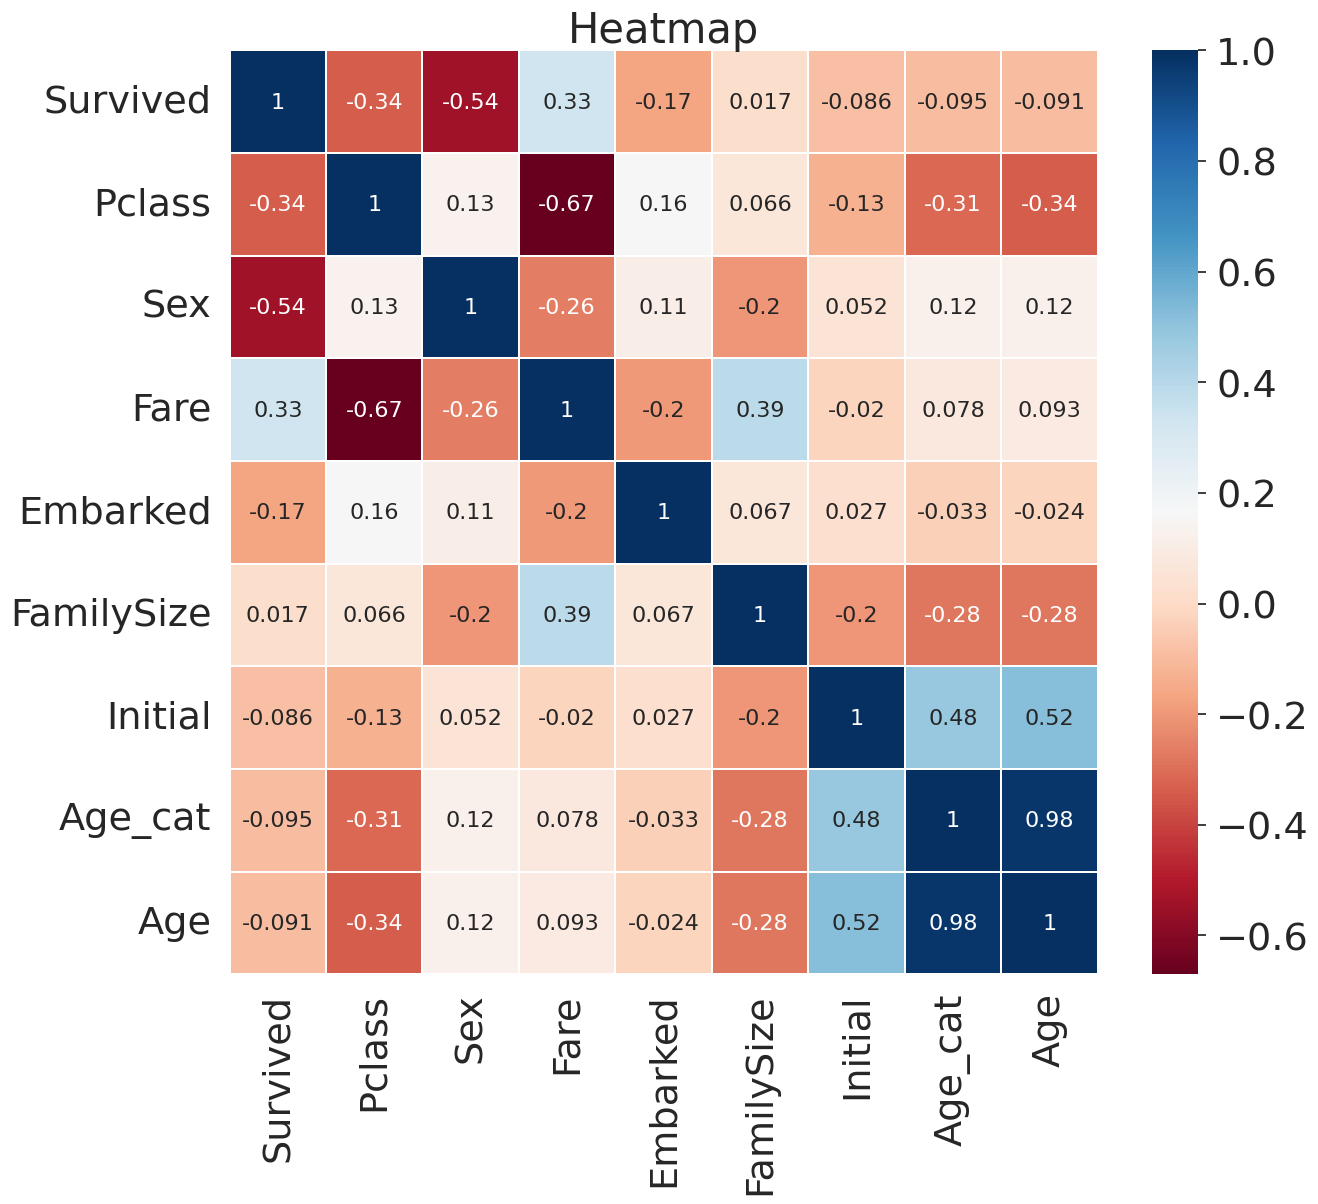

In [54]:
colormap = plt.cm.RdBu
plt.figure(figsize = (14, 12))
plt.title('Heatmap')
sns.heatmap(heatmap_data.astype(float).corr(),
           linewidths = 0.1,
           cmap = colormap,
           annot = True,
           annot_kws = {"size" : 16})

plt.show()

## 데이터 인코딩

In [55]:
df_train = pd.get_dummies(df_train, columns = ['Initial'], prefix = 'Initial')
df_test = pd.get_dummies(df_test, columns = ['Initial'], prefix = 'Initial')

In [56]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,False,False,True,False,False


In [57]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = 'Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix = 'Embarked')

In [58]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,...,2,2,False,False,True,False,False,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,...,2,3,False,False,False,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,...,1,2,False,True,False,False,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,...,2,3,False,False,False,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,...,1,3,False,False,True,False,False,False,False,True


In [59]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'FamilySize', 'Age_cat',
       'Initial_0', 'Initial_1', 'Initial_2', 'Initial_3', 'Initial_4',
       'Embarked_0', 'Embarked_1', 'Embarked_2'],
      dtype='object')

In [60]:
# 필요없는 columns 삭제
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace = True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [61]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,False,False,True,False,False,False,False,True
1,1,1,0,38.0,4.266662,2,3,False,False,False,True,False,True,False,False
2,1,3,0,26.0,2.070022,1,2,False,True,False,False,False,False,False,True
3,1,1,0,35.0,3.972177,2,3,False,False,False,True,False,False,False,True
4,0,3,1,35.0,2.085672,1,3,False,False,True,False,False,False,False,True


In [62]:
df_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0        bool
Initial_1        bool
Initial_2        bool
Initial_3        bool
Initial_4        bool
Embarked_0       bool
Embarked_1       bool
Embarked_2       bool
dtype: object

In [63]:
dummies = ['Initial_0', 'Initial_1', 'Initial_2', 'Initial_3', 'Initial_4', 'Embarked_0', 'Embarked_1', 'Embarked_2']

for dum in dummies:
    df_train[dum] = df_train[dum].astype('int')
    df_test[dum] = df_test[dum].astype('int')

In [64]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,2.085672,1,3,0,0,1,0,0,0,0,1


## 모델 개발 및 학습

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

- 데이터 분리

In [66]:
X_train = df_train.drop('Survived', axis = 1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [67]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label,
                                           test_size = 0.2,
                                           random_state = 0)

In [68]:
X_tr.shape, X_vld.shape, y_tr.shape, y_vld.shape

((712, 14), (179, 14), (712,), (179,))

### 모델생성 및 학습

- RandomForestClassifier

In [69]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [70]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞힘'. format(y_vld.shape[0], 
                                            100 * metrics.accuracy_score(prediction, y_vld)))

총 179명 중 83.80% 정확도로 생존을 맞힘


- test셋 예측 수행

In [71]:
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [72]:
pred = model.predict(X_test)
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [73]:
df_submission['Survived'] = pred

In [74]:
df_submission.to_csv('first_submission.csv', index = False)

- Feature importance확인

In [75]:
feature_importance = model.feature_importances_
Series_feat_imp = pd.Series(feature_importance, index = df_test.columns)

In [76]:
Series_feat_imp

Pclass        0.075642
Sex           0.114143
Age           0.188215
Fare          0.242966
FamilySize    0.080519
Age_cat       0.061969
Initial_0     0.006678
Initial_1     0.031139
Initial_2     0.131684
Initial_3     0.026581
Initial_4     0.002447
Embarked_0    0.012194
Embarked_1    0.009337
Embarked_2    0.016488
dtype: float64

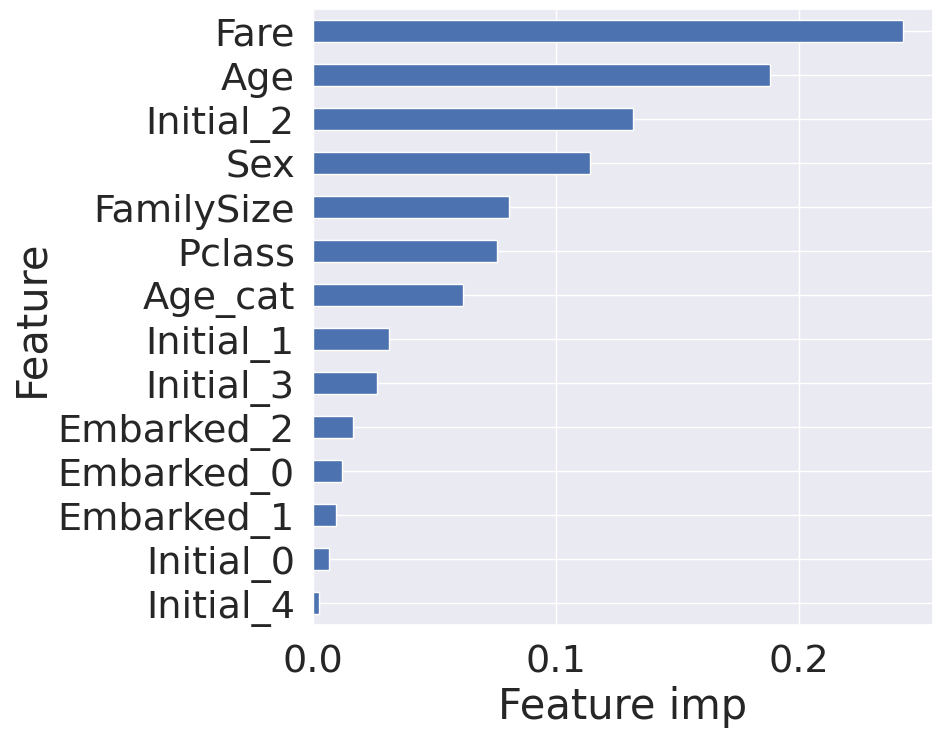

In [77]:
plt.figure(figsize = (8, 8))

Series_feat_imp.sort_values(ascending = True).plot.barh()
plt.xlabel('Feature imp')
plt.ylabel('Feature')

plt.show()

- Pytorch NN

In [78]:
import torch

In [79]:
X_tr.shape, X_vld.shape, y_tr.shape, y_vld.shape

((712, 14), (179, 14), (712,), (179,))

In [80]:
X_tr_torch = torch.tensor(X_tr, dtype=torch.float)
y_tr_torch = torch.tensor(y_tr, dtype=torch.float)

X_vld_torch = torch.tensor(X_vld, dtype=torch.float)
y_vld_torch = torch.tensor(y_vld, dtype=torch.float)

In [81]:
X_tr_torch.shape, y_tr_torch.shape, X_vld_torch.shape, y_vld_torch.shape

(torch.Size([712, 14]),
 torch.Size([712]),
 torch.Size([179, 14]),
 torch.Size([179]))

In [82]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.layer1 = torch.nn.Sequential(
        torch.nn.Linear(14, 512),
        torch.nn.ReLU(),
        torch.nn.Dropout(0.2))
        
        self.layer2 = torch.nn.Sequential(
        torch.nn.Linear(512, 512),
        torch.nn.ReLU(),
        torch.nn.Dropout(0.2))
        
        self.layer3 = torch.nn.Linear(512, 2)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

model = Net()
print(model)

Net(
  (layer1): Sequential(
    (0): Linear(in_features=14, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (layer2): Sequential(
    (0): Linear(in_features=512, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
  )
  (layer3): Linear(in_features=512, out_features=2, bias=True)
)


In [83]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

dataset = TensorDataset(X_tr_torch, y_tr_torch)
dataloader = DataLoader(dataset, batch_size = 64)

In [84]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [85]:
epochs = 1500
train_loss_min = np.Inf

for epoch in range(epochs):
    num_right = 0
    train_loss = 0
    
    for batch_idx, samples in enumerate(dataloader):
        x_tr, y_tr = samples
        
        prediction = model(x_tr)
        loss = criterion(prediction, y_tr.long())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        labels = torch.argmax(prediction, dim = -1)
        num_right += torch.sum(labels == y_tr)
        
        train_loss += loss.item() * len(x_tr)
        
    train_loss = train_loss / len(X_tr_torch)
    
    if (epoch +1) % 20 == 0:
        print('Epoch {}/{}, Prediction : {}/{}, Cost : {}'.format(epoch+1, epochs, num_right, len(X_train), train_loss))
    if train_loss <= train_loss_min:
        print('=*=*=*= Loss decreased ({:6f} ===> {:6f}). Saving the model! =*=*=*='.format(train_loss_min, train_loss))
        torch.save(model.state_dict(), 'model.pt')
        train_loss_min = train_loss

=*=*=*= Loss decreased (   inf ===> 7.389462). Saving the model! =*=*=*=
=*=*=*= Loss decreased (7.389462 ===> 0.817414). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.817414 ===> 0.667022). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.667022 ===> 0.605292). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.605292 ===> 0.537919). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.537919 ===> 0.525675). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.525675 ===> 0.501527). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.501527 ===> 0.465017). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.465017 ===> 0.447798). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.447798 ===> 0.427885). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.427885 ===> 0.417761). Saving the model! =*=*=*=
=*=*=*= Loss decreased (0.417761 ===> 0.412627). Saving the model! =*=*=*=
Epoch 20/1500, Prediction : 589/891, Cost : 0.4046902536006456
=*=*=*= Loss decreased (0.412627 ===> 0

- vld셋 정확도 확인

In [86]:
with torch.no_grad():
    result = model(X_vld_torch)
labels = torch.argmax(result, dim = -1)
survived = labels.numpy()

In [87]:
vs = pd.DataFrame({'actual': y_vld, 'pred' : survived})
vs.head()

,actual,pred
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1


In [88]:
matches = (vs['actual'] == vs['pred'])
accuracy = matches.mean()

print(accuracy)
# vld셋에대해 81%의 정확도를 보임.

0.8212290502793296


- test셋 예측 및 제출

In [89]:
X_test_torch = torch.tensor(X_test, dtype=torch.float)

with torch.no_grad():
    result = model(X_test_torch)
labels = torch.argmax(result, dim = -1)
survived = labels.numpy()

In [90]:
df_submission['Survived'] = pd.Series(survived)

In [91]:
df_submission.to_csv('second_submission.csv', index = False)